# A First Look at Deep Learning using Keras   Part  1




![](http://zacharski.org/files/courses/cs419/keras.jpg)
This notebook is intended to be a first quick hands-on introduction to deep learning using TensorFlow and Keras. So, what are we waiting for. Let's get started

### Note: You may want to run this notebook on colab.research.google.com

### Answer questions - no xp
Throughout this notebook there are questions for you to answer. It is easy to go through a notebook without understanding---click, click, click through the cells. The questions are designed to help you pause and think.

Let's import the Keras library

In [2]:
import keras
keras.__version__

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.2.2'

# A first look at a neural network

Let's examine how Keras learns to classify 
hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this 
first example right away. 

Remember, the problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [26]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [11]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# The data
To get an idea of what the data looks like let's display a few images.

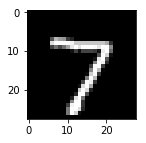

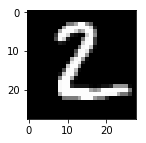

In [13]:
import matplotlib.pyplot as plt

def viewImage(x):
    plt.figure(figsize=(2,2))
    plt.imshow(x, interpolation='nearest', cmap='gray')
    plt.show()
    
viewImage(test_images[0])
viewImage(test_images[1])

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [27]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.


### Explained yet again
Okay, let's look at each of the above code lines

     network = models.Sequential()
     
My English translation of this is "We want a model with a linear stack of layers."  The model initially has zero layers.

     network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
     
Here we add a layer to the model. `Dense` means that every input node (since this is the first layer, this means every input feature) is connected to every node in this layer.  The `512` means how many node we want in this layer -- 512. `activation=relu` defines the activation function. We will talk about this later. Finally we define what the shape of the input is. Since every image is 28 x 28, our input shape is 28 * 28 or 784. 

     network.add(layers.Dense(10, activation='softmax'))
     
Here we add another layer. Again, `Dense` means that each node of the 512 nodes of the pervious layer are connected to the 10 of this layer. The `10` means there are 10 nodes. 

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

Keras makes this task much easier:

In [28]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [29]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Why are we dividing each pixel by 255? What did the original number represent?


We also need to categorically encode the labels:

In [30]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### What does the first test label look like? (print it out)
And what is this called?

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [31]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.2589 - acc: 0.9244
Epoch 2/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.1054 - acc: 0.9686
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0693 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0506 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.0384 - acc: 0.9886


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [32]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 47us/step


In [33]:
print('test_acc:', test_acc)

test_acc: 0.9787



Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 


### Accuracy with 7 epochs
What is the accuracy on our test data if we use 7 epochs?  



### Accuracy without training
What is the accuracy on our test data using our network before we do any training (before `fit`)?

### Training
As you can see from your above experiment, before we fit the model the accuracy was not very good. Before training, the weight are set at random (not exactly, but let's keep it simple for now). 




![](http://zacharski.org/files/courses/cs419/deepLearning.png)

When we were fitting the model:

     network.fit(train_images, train_labels, epochs=5, batch_size=128)
    
we processed 128 images at a time (this is called batch_size). Everytime we processed the images in that batch we calculated the loss and adjusted the weights to improve the network's  performance. Each time we go through the entire dataset we call it an epoch. So in our initial training, we went through the dataset 5 times.  Once we have gone through the data 5 times we stop and now we have a trained neural network. 'Trained' simply means that we have a network with the weight adjusted to reduce loss.


# You Try  - Fashion. 15xp

### finally some xp

As a small first step try out the FashionMNIST dataset that we've seen before.

![](http://zacharski.org/files/courses/cs419/clothes-sprite.png)
![](http://zacharski.org/files/courses/cs419/clothing.gif)


The dataset consists of small 28x28 grayscale image icons of different articles of clothing. There are 60,000 images in the training set and 10,000 in the test set. Each image has an associated label from a list of 10:


| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



#### The files

* Training set: [clothes_train.csv](http://zacharski.org/files/courses/cs419/clothes_train.csv)
* Test set: [clothing_test.csv](http://zacharski.org/files/courses/cs419/cTest.csv) Note: Don't use the test set for training.

Can you create a network with one hidden layer similar to the example above and train it?


In [51]:
# TBD

### What is its accuracy on the test data?

### Q8 a two hidden layer network in Keras.
Can you construct and train a new network that has two hidden layers 
(as before, the first layer can have 512 neurons - the second should have 256)? What is its accuracy on the test data? 

In [52]:
# TBD

# Volcanoes on Venus - 35xp

![](https://upload.wikimedia.org/wikipedia/commons/1/16/Maat_Mons_on_Venus.jpg)


### First, no one has been to Venus
I felt I needed to say that upfront because we don't really know if there are volcanoes on Venus. An analysis of the data by experts is not 100% accurate so the labels are the experts best guess.

The images are from NASA's Magellan spacecraft which was launched on May 4, 1989 and made it to Venus on August 10, 1990. Magellan mapped the surface of Venus using synthetic aperture radar. Some images have black blocks in them caused by either problems with Magellan or with communication back to earth. 

### The data
The images are 110x110 grayscale pixels. The value of each pixel ranges from 0 to 255. Your task it to build a classifier that will predict whether a volcano is present in the image or not.

#### The files

* Training images: [volcanoes_train_images.csv](http://zacharski.org/files/courses/cs419/volcanoes_train_images.csv)
* Training labels: [volcanoes_train_labels.csv](http://zacharski.org/files/courses/cs419/volcanoes_train_labels.csv) 
* Testing images: [volcanoes_test_images.csv](http://zacharski.org/files/courses/cs419/volcanoes_test_images.csv)
* Testing labels: [volcanoes_test_labels.csv](http://zacharski.org/files/courses/cs419/volcanoes_test_labels.csv) 




## Tasks

There are 5 tasks

1. A simple task: Can you display a few of the images from the dataset?
2. Build a model with one hidden layer. Train it for 2 epochs. What is it's accuracy?
3. Build a model with one hidden layer. Train it for 10 epochs. What is it's accuracy? 
4. Does increasing the epochs beyond 10 improve accuracy?
5. Build a model with 2 hidden layers and test.

#### Remix
Remix by Ron Zacharski. Orginal Python notebook by François Chollet

### MIT License

Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.